In [174]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-dataset/telecom_churn_data.csv


Importing the neccesaary libraries

In [175]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## DATA UNDERSTANDING

Loading the data

In [176]:
data = pd.read_csv("/kaggle/input/telecom-churn-dataset/telecom_churn_data.csv")
print(data.shape)
data.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [177]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

Looking into the summary statistics of the data

In [178]:
data.describe(include = "all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## DATA CLEANING

Dropping all single value columns

In [179]:
def value_count_feature(features) :
    for i in features :
        print(data[i].value_counts(), "\n")
    return None
value_count_feature(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "circle_id", "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"])
data.drop(columns = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "circle_id", "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"], inplace = True)
data.head()

0.0    98981
Name: loc_og_t2o_mou, dtype: int64 

0.0    98981
Name: std_og_t2o_mou, dtype: int64 

0.0    98981
Name: loc_ic_t2o_mou, dtype: int64 

109    99999
Name: circle_id, dtype: int64 

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64 

7/31/2014    99398
Name: last_date_of_month_7, dtype: int64 

8/31/2014    98899
Name: last_date_of_month_8, dtype: int64 

9/30/2014    98340
Name: last_date_of_month_9, dtype: int64 

0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64 

0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64 

0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64 

0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64 



,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN

Dropping columns like mobile number and date related columns since they don't provide much information

In [180]:
data.drop(columns = ["mobile_number", "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9", "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9"], inplace = True)

Checking the percentage of missing vslues for each column

In [181]:
(data.loc[:, data.isnull().any()].isnull().sum() / data.shape[0]) * 100

onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_t2c_mou_8       5.378054
loc_og_t

Looking at the missing values of recharge related columns, it is evident that the recharge columns corresponding to a month are missing in unison. One can say that these customers did not do a recharge in those months. Hence these missing values are imputed with 0


In [182]:
features = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9", "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9", "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
for i in features :
    data[i].fillna(value = 0, inplace = True)

Looking into the percentage of missing values 

In [183]:
(data.loc[:, data.isnull().any()].isnull().sum() / data.shape[0]) * 100

onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_6    3.937039
loc_og_t2f_mou_7    3.859039
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_6    3.937039
loc_og_t2c_mou_7    3.859039
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou_9    7.745077
loc_og_mou_6        3.937039
loc_og_mou_7        3.859039
loc_og_mou_8  

Imputing missing values of remaining numerical columns using MICE Imputation

In [184]:
col = data.columns
imputer = IterativeImputer(max_iter = 5, random_state = 100, initial_strategy = "median")
data = imputer.fit_transform(data)
data = pd.DataFrame(data, columns = col)
print("The no of remaining columns having missing values is {}".format(data.isnull().any().sum()))

The no of remaining columns having missing values is 0


### FILTERING HIGH VALUE CUSTOMERS

Total recharge for data is calculated as total_rech_amt_data = total_rech_data * av_rech_amt_data. Average recharge done by the customer during the months 6, 7 is computed using the total call recharge and data recharge. Customers whose average recharge is greater than the 70th percentile are treated as high value customers and they are filtered. Intermediary variables created for filtering high value customers are removed after their use.

In [185]:
months = [6, 7]
for i in months :
    data["total_rech_amt_data_{}".format(i)] = data["total_rech_data_{}".format(i)] * data["av_rech_amt_data_{}".format(i)]
    data["total_rech_{}".format(i)] = data["total_rech_amt_{}".format(i)] + data["total_rech_amt_data_{}".format(i)]
    
data["av_rech_6_7"] = (data["total_rech_6"] + data["total_rech_7"]) / 2
data = data[data["av_rech_6_7"] >= data["av_rech_6_7"].quantile(0.7)]
data.drop(columns = ["av_rech_6_7", "total_rech_6", "total_rech_7", "total_rech_amt_data_6", "total_rech_amt_data_7"], inplace = True)
print(data.shape)
data.head()

(30001, 205)


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,-69.546165,-48.547861,0.00,-58.681562,73.785475,52.573281,0.00,51.774661,11.445442,3.316528,0.00,0.915009,0.434446,-9.723928,0.00,-9.314821,-11.281323,-15.023151,0.00,-13.744638,41.03035,40.428742,0.00,39.119730,-0.001693,-0.00126,0.00,-0.001627,0.787622,-1.192899,0.00,-0.404650,29.567854,25.297874,0.00,25.285173,-4.244127,-4.339135,0.00,-5.001404,3.950258,3.635754,0.00,2.500327,-0.001985,-0.000365,0.00,-0.002137,0.0,0.0,0.0,0.0,-0.35421,-0.734435,0.00,-2.538039,-29.129915,-24.533779,0.00,-22.723284,-0.002075,-0.001307,0.00,-0.002368,-0.003172,0.004454,0.0,0.000916,0.00,0.00,0.00,0.00,-15.162081,-16.906202,0.16,-15.741752,56.489306,57.078656,4.13,56.610799,0.880202,0.930738,1.15,0.959790,42.113154,41.044008,5.44,41.802814,-11.460886,-11.554095,0.00,-11.308654,2.03012,2.039983,0.00,1.739890,-0.000328,-0.000188,0.00,-0.000143,-9.455366,-9.53339,0.00,-9.577515,0.00,0.00,5.44,0.00,-32.242024,-31.092427,0.0,-32.133170,-0.053478,-0.224646,0.00,-0.006358,-0.000276,-0.000301,0.00,-0.000248,4

## FEATURE ENGINEERING

Creating target variable "Churn" based on total call and data usage for the 9th month. After the target variable is created, all columns related to the 9th month are removed.

In [186]:
data["Churn"] = (data[["total_og_mou_9", "total_ic_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]].sum(axis = 1) == 0).astype(int)
for i in data.columns :
    if i.endswith("_9") :
        data.drop(columns = i, inplace = True)
        
data.drop(columns = "sep_vbc_3g", inplace = True)
print(data.shape)
data.head()

(30001, 155)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
0,197.385,214.816,213.803,-69.546165,-48.547861,0.00,73.785475,52.573281,0.00,11.445442,3.316528,0.00,0.434446,-9.723928,0.00,-11.281323,-15.023151,0.00,41.03035,40.428742,0.00,-0.001693,-0.00126,0.00,0.787622,-1.192899,0.00,29.567854,25.297874,0.00,-4.244127,-4.339135,0.00,3.950258,3.635754,0.00,-0.001985,-0.000365,0.00,0.0,0.0,0.0,-0.35421,-0.734435,0.00,-29.129915,-24.533779,0.00,-0.002075,-0.001307,0.00,-0.003172,0.004454,0.0,0.00,0.00,0.00,-15.162081,-16.906202,0.16,56.489306,57.078656,4.13,0.880202,0.930738,1.15,42.113154,41.044008,5.44,-11.460886,-11.554095,0.00,2.03012,2.039983,0.00,-0.000328,-0.000188,0.00,-9.455366,-9.53339,0.00,0.00,0.00,5.44,-32.242024,-31.092427,0.0,-0.053478,-0.224646,0.00,-0.000276,-0.000301,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1
7,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.63000,447.380000,162.28,62.130000,55.14000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,0.0,0.0,0.0,60.86000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.08000,193.94,626.46,558.04,428.74,0.21

Looking at the class distribution for the target variable "Churn"

0    91.863605
1     8.136395
Name: Churn, dtype: float64


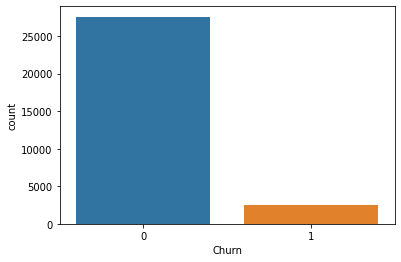

In [187]:
print((data["Churn"].value_counts() / data.shape[0]) * 100)
sns.countplot(x = "Churn", data = data)
plt.show()

Creating new features by computing the difference between the 8th month and the average of the 6th and 7th month for each existing feature.

In [188]:
data.rename(columns = {"jun_vbc_3g" : "vbc_3g_6", "jul_vbc_3g" : "vbc_3g_7", "aug_vbc_3g" : "vbc_3g_8"}, inplace = True)
telecom = data.drop(columns = ["Churn", "aon", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"])
for i in set([k[:-1] for k in list(telecom.columns)]) :
   telecom[i+"diff"] = ((telecom[i+"6"] + telecom[i+"7"]) / 2) - telecom[i+"8"]
   #telecom.drop(columns = [i+"6", i+"7", i+"8"], inplace = True)
telecom = pd.concat((telecom, data[["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8", "aon", "Churn"]]), axis = 1)
print(telecom.shape)
telecom.head()

(30001, 204)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,loc_og_t2f_mou_diff,max_rech_data_diff,vbc_3g_diff,loc_og_t2m_mou_diff,std_og_t2m_mou_diff,isd_ic_mou_diff,std_og_t2c_mou_diff,ic_others_diff,total_rech_amt_diff,count_rech_2g_diff,av_rech_amt_data_diff,sachet_2g_diff,spl_ic_mou_diff,loc_ic_t2t_mou_diff,arpu_3g_diff,onnet_mou_diff,loc_og_t2t_mou_diff,arpu_2g_diff,loc_ic_t2f_mou_diff,sachet_3g_diff,std_ic_t2f_mou_diff,offnet_mou_diff,std_og_t2t_mou_diff,vol_3g_mb_diff,std_ic_mou_diff,std_ic_t2t_mou_diff,count_rech_3g_diff,vol_2g_mb_diff,monthly_3g_diff,max_rech_amt_diff,total_rech_num_diff,total_rech_data_diff,loc_og_mou_diff,total_og_mou_diff,monthly_2g_diff,last_day_rch_amt_diff,loc_ic_mou_diff,roam_og_mou_diff,std_og_mou_diff,loc_ic_t2m_mou_diff,loc_og_t2c_mou_diff,roam_ic_mou_diff,og_others_diff,total_ic_mou_diff,std_ic_t2m_mou_diff,isd_og_mou_diff,std_og_t2f_mou_diff,spl_og_mou_diff,arpu_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,Churn
0,197.385,214.816,213.803,-69.546165,-48.547861,0.00,73.785475,52.573281,0.00,11.445442,3.316528,0.00,0.434446,-9.723928,0.00,-11.281323,-15.023151,0.00,41.03035,40.428742,0.00,-0.001693,-0.00126,0.00,0.787622,-1.192899,0.00,29.567854,25.297874,0.00,-4.244127,-4.339135,0.00,3.950258,3.635754,0.00,-0.001985,-0.000365,0.00,0.0,0.0,0.0,-0.35421,-0.734435,0.00,-29.129915,-24.533779,0.00,-0.002075,-0.001307,0.00,-0.003172,0.004454,0.0,0.00,0.00,0.00,-15.162081,-16.906202,0.16,56.489306,57.078656,4.13,0.880202,0.930738,1.15,42.113154,41.044008,5.44,-11.460886,-11.554095,0.00,2.03012,2.039983,0.00,-0.000328,-0.000188,0.00,-9.455366,-9.53339,0.00,0.00,0.00,5.44,-32.242024,-31.092427,0.0,-0.053478,-0.224646,0.00,-0.000276,-0.000301,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,2

## EXPLORATORY DATA ANALYSIS 

Separating the numerical and categorical columns

In [189]:
cat_col = ["Churn", "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "fb_user_6", "fb_user_7", "fb_user_8"]
num_col = telecom.drop(columns = cat_col).columns

In [190]:
def data_type(var) :
    if var in cat_col :
        return "categorical"
    elif var in num_col :
        return "numerical"
        

def univ_plot(var) :
    if data_type(var) == "numerical" :
        sns.distplot(telecom[var])
    elif data_type(var) == "categorical" :
        sns.countplot(data[var])
        
        
def biv_plot(var1, var2) :
    if (data_type(var1) == "numerical") and (data_type(var2) == "numerical") :
        sns.scatterplot(var1, var2, data = telecom)
    elif (data_type(var1) == "numerical" and data_type(var2) == "categorial") or (data_type(var1) == "categorical" and data_type(var2) == "numerical") :
        sns.boxplot(var1, var2, data = telecom)

Plotting univariate plots for the features

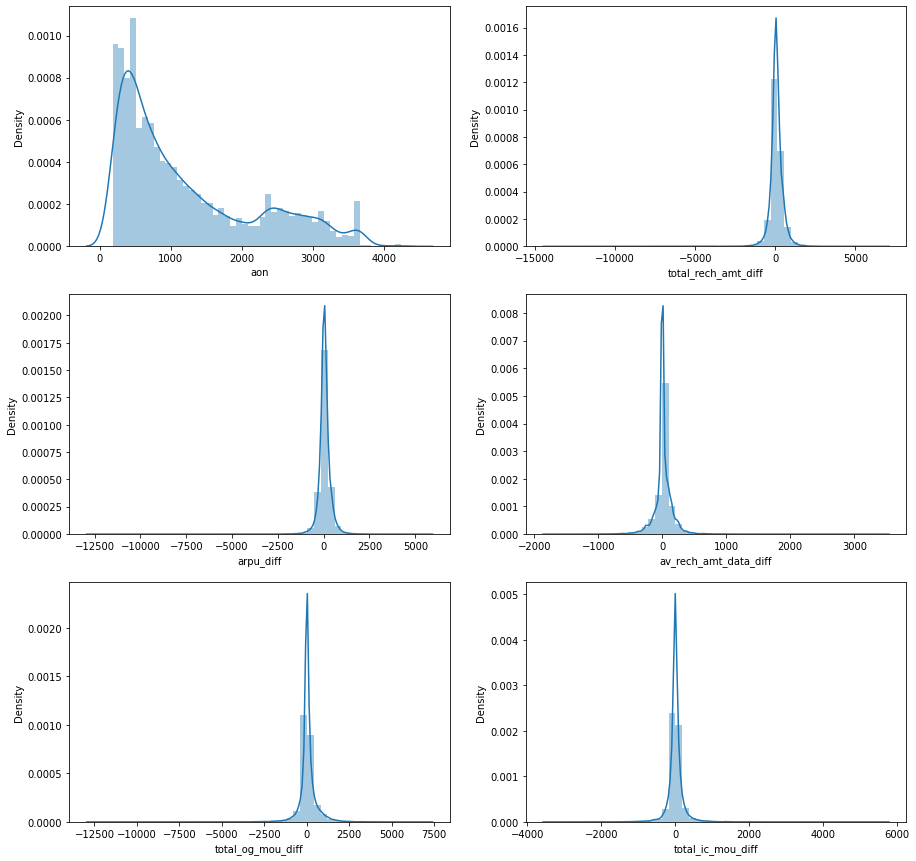

In [191]:
univ_plots = ["aon", "total_rech_amt_diff", "arpu_diff", "av_rech_amt_data_diff", "total_og_mou_diff", "total_ic_mou_diff"]
no_plots = len(univ_plots)
plt.figure(figsize = (15, 15))
if no_plots % 2 == 0 :
    for i, var in enumerate(univ_plots) :
        plt.subplot(no_plots/2, 2, i + 1)
        univ_plot(var)
else :
    for i, var in enumerate(univ_plots) :
        plt.subplot((no_plots/2) + 1, 2, i + 1)
        univ_plot(var)
plt.show()        

* From the plots it is clear that outliers are present in some of the numerical features
* For many of the diff features that were derived, the value is around 0 for most customers


Plotting bivariate plots

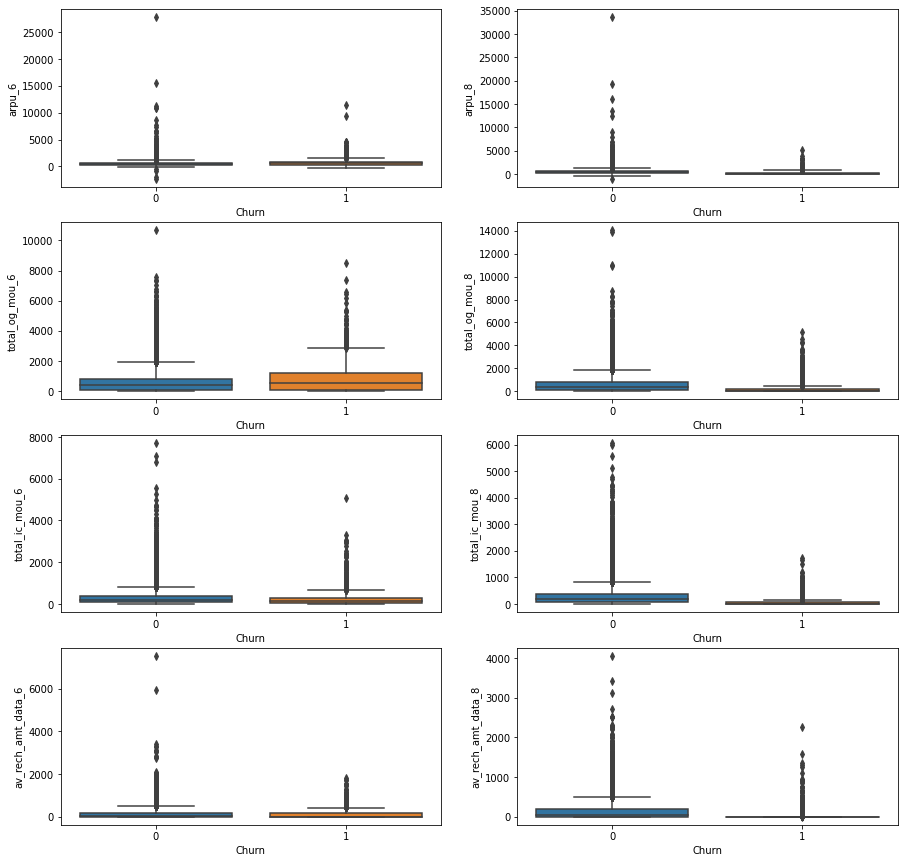

In [192]:
biv_plots = ["arpu_6", "arpu_8", "total_og_mou_6", "total_og_mou_8", "total_ic_mou_6", "total_ic_mou_8", "av_rech_amt_data_6", "av_rech_amt_data_8"]
no_plots = len(biv_plots)
plt.figure(figsize = (15, 15))
if no_plots % 2 == 0 :
    for i, var in enumerate(biv_plots) :
        plt.subplot(no_plots/2, 2, i + 1)
        biv_plot("Churn", var)
else :
    for i, var in enumerate(biv_plots) :
        plt.subplot((no_plots/2) + 1, 2, i + 1)
        biv_plot("Churn", var)
plt.show()        

* The distribution of most of the numerical variables is almost the same for both churn and non churn customers during the 6th month
* The value of the numerical variables is lower for churn customers compared to non churn customers during the 8th month

### OUTLIER TREATMENT

Capping outliers for all numerical features

In [193]:
def cap_out(features) :
    for ft in features :
        upper_limit = telecom[ft].mean() + telecom[ft].std()
        lower_limit = telecom[ft].mean() - telecom[ft].std()
        telecom[ft][telecom[ft] > upper_limit] = upper_limit
        telecom[ft][telecom[ft] < lower_limit] = lower_limit

cap_out(num_col)

## MODELLING

In [194]:
X = telecom.drop(columns = "Churn")
y = telecom["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 203)
(9001, 203)
(21000,)
(9001,)


### PCA

Standardising the features bedore applying PCA

In [195]:
col = pd.Series(X_train.columns)
col.index = X_train.columns
scaler = StandardScaler()
X_train.loc[:, ~(col.isin(cat_col))] = scaler.fit_transform(X_train.loc[:, ~(col.isin(cat_col))])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,loc_og_t2f_mou_diff,max_rech_data_diff,vbc_3g_diff,loc_og_t2m_mou_diff,std_og_t2m_mou_diff,isd_ic_mou_diff,std_og_t2c_mou_diff,ic_others_diff,total_rech_amt_diff,count_rech_2g_diff,av_rech_amt_data_diff,sachet_2g_diff,spl_ic_mou_diff,loc_ic_t2t_mou_diff,arpu_3g_diff,onnet_mou_diff,loc_og_t2t_mou_diff,arpu_2g_diff,loc_ic_t2f_mou_diff,sachet_3g_diff,std_ic_t2f_mou_diff,offnet_mou_diff,std_og_t2t_mou_diff,vol_3g_mb_diff,std_ic_mou_diff,std_ic_t2t_mou_diff,count_rech_3g_diff,vol_2g_mb_diff,monthly_3g_diff,max_rech_amt_diff,total_rech_num_diff,total_rech_data_diff,loc_og_mou_diff,total_og_mou_diff,monthly_2g_diff,last_day_rch_amt_diff,loc_ic_mou_diff,roam_og_mou_diff,std_og_mou_diff,loc_ic_t2m_mou_diff,loc_og_t2c_mou_diff,roam_ic_mou_diff,og_others_diff,total_ic_mou_diff,std_ic_t2m_mou_diff,isd_og_mou_diff,std_og_t2f_mou_diff,spl_og_mou_diff,arpu_diff,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon
81898,-0.911273,-1.167721,-0.237088,-0.798258,-0.787941,-0.732648,-0.712081,-0.901753,-0.604452,-0.368072,-0.316749,-0.334499,-0.371067,-0.334295,-0.336810,-0.692304,-0.686341,-0.642649,-0.155283,-0.669541,-0.118481,-0.540265,0.371058,0.086639,-0.433010,1.096950,-0.432807,-0.448637,-0.751845,-0.380385,-0.565798,-0.565082,-0.528517,-0.636906,-0.630199,-0.586462,0.098269,-0.292811,0.789570,0.0,0.0,0.0,-0.735722,-0.737353,-0.669556,-0.034818,-0.053195,0.046486,-0.601116,-0.107586,-0.610566,-0.420164,-0.058005,-0.057165,-0.908411,-1.036366,-0.791810,-0.663689,-0.787412,-0.587513,0.351671,0.927421,2.099639,0.345613,2.055045,2.390796,-0.017537,0.492750,1.962491,-0.459510,-0.460464,-0.428575,-0.614056,-0.583566,0.615095,2.135004,0.360061,2.937608,-0.451792,-0.585389,0.479911,-0.208279,0.171153,1.655459,0.045106,0.103892,0.182497,-0.311095,-0.324258,-0.31865,-0.276642,-0.282298,-0.280986,-0.640063,-0.768254,-0.481

Perform PCA on X_train and generate principle components that have a cumulative explained variance ratio of around 95%

In [196]:
pca = PCA(n_components = 0.95, random_state = 100)
X_train_pca= pca.fit_transform(X_train)
print("No of principle components : {}".format(pca.components_.shape[0]))

No of principle components : 80


Scaling and applying PCA on test data using parameters learnt from the training data

In [197]:
col = pd.Series(X_test.columns)
col.index = X_test.columns
X_test.loc[:, ~(col.isin(cat_col))] = scaler.transform(X_test.loc[:, ~(col.isin(cat_col))])
X_test_pca = pca.transform(X_test)

Creating a function for predicting and computing metrics suchas roc_auc score, sensitivity and specificity

In [198]:
def pred_score(model, x, y) :
    y_pred = model.predict(x)
    print("Confusion_matrix :")
    conf_mat = metrics.confusion_matrix(y, y_pred)
    print(conf_mat)
    sensitivity = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0])
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    print("Sensitivity : {0}, Specificity : {1}".format(sensitivity, specificity))
    print("roc_auc_score : ", metrics.roc_auc_score(y, y_pred))

Tuning the hyperparameters for a logistic regression model. Using class_weight = "balanced" to tackle the class imbalance issue

In [199]:
params = {"penalty" : ["l2", "l1"], "C" : [0.001, 0.01, 0.1, 1, 10, 100]}
model_cv = GridSearchCV(param_grid = params, estimator = LogisticRegression(class_weight = "balanced", random_state = 100),  scoring = "roc_auc", cv = 5,
                        verbose = 1, return_train_score = True, n_jobs = -1)
model_cv.fit(X_train_pca, y_train)
print("Best_score :", model_cv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best_score : 0.910490715083305


In [200]:
cv_results = pd.DataFrame(model_cv.cv_results_).sort_values(by = "mean_test_score", ascending = False)
cv_results["diff_train_test"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]
cv_results[["rank_test_score", "mean_train_score", "mean_test_score", "diff_train_test"]]

,rank_test_score,mean_train_score,mean_test_score,diff_train_test
0,1,0.916386,0.910491,0.005895
2,2,0.918654,0.910485,0.008169
4,3,0.918800,0.910149,0.008651
6,4,0.918810,0.910107,0.008704
8,5,0.918811,0.910098,0.008712
10,6,0.918810,0.910097,0.008714
1,7,NaN,NaN,NaN
3,8,NaN,NaN,NaN
5,9,NaN,NaN,NaN
7,10,NaN,NaN,NaN


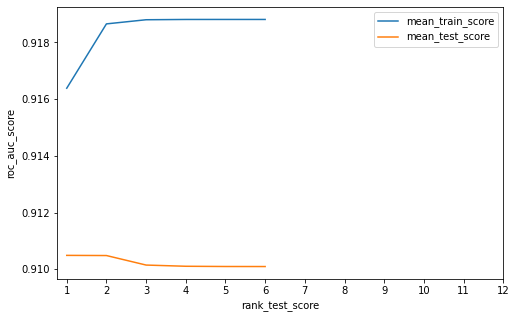

In [201]:
plt.figure(figsize = (8, 5))
plt.plot(cv_results["rank_test_score"], cv_results["mean_train_score"])
plt.plot(cv_results["rank_test_score"], cv_results["mean_test_score"])
plt.xlabel("rank_test_score")
plt.xticks(range(1,13))
plt.ylabel("roc_auc_score")
plt.legend(labels = ["mean_train_score", "mean_test_score"], loc = "upper right")
plt.show()

From looking at the plot and dataframe, it seems that choosing the parameters for which the mean_test_score ranks 1st is the best suitable option because the mean_test_score is the highest and the difference between mean_train_score and mean_test_score is the lowest

In [202]:
cv_results[cv_results["rank_test_score"] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,diff_train_test
0,0.220594,0.015393,0.005655,0.000144,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.898816,0.91525,0.916714,0.902679,0.918995,0.910491,0.008137,1,0.918976,0.915696,0.914806,0.918499,0.913952,0.916386,0.002003,0.005895


Building a logistic regression model using these parameters

In [203]:
model_1 = LogisticRegression(class_weight = "balanced", random_state = 100, C = 0.001, penalty = "l2")
model_1.fit(X_train_pca, y_train)

LogisticRegression(C=0.001, class_weight='balanced', random_state=100)

Evaluating the model on the train data

In [204]:
print("Scores on the training data")
pred_score(model_1, X_train_pca, y_train)

Scores on the training data
Confusion_matrix :
[[16475  2816]
 [  287  1422]]
Sensitivity : 0.8320655354008192, Specificity : 0.8540251930952257
roc_auc_score :  0.8430453642480226


Plotting the sensitivity-specificity curve for model_1

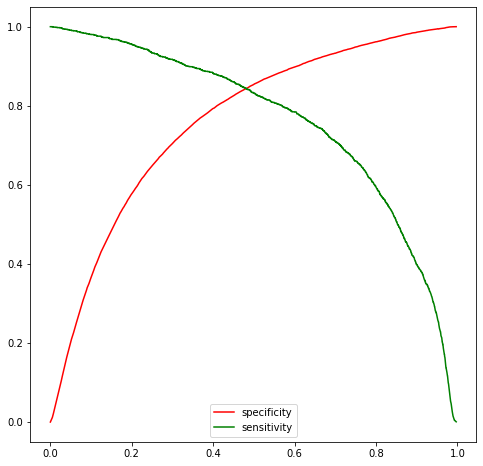

In [205]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, model_1.predict_proba(X_train_pca)[:, 1])
plt.figure(figsize = (8, 8))
plt.plot(thresholds[1:], 1 - fpr[1:], color = 'r')
plt.plot(thresholds[1:], tpr[1:], color = 'g')
plt.legend(labels = ["specificity", "sensitivity"])
plt.show()

**Choosing a probability threshold value of 0.4 to improve the sensitivity of the model**

In [206]:
y_train_pred = pd.Series(model_1.predict_proba(X_train_pca)[:, 1]).apply(lambda x : 1 if x >= 0.4 else 0)
conf_mat = metrics.confusion_matrix(y_train, y_train_pred)
sensitivity = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0])
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
print("\nOn the training data")
print("Sensitivity : {0}, Specificity : {1}".format(sensitivity, specificity))


On the training data
Sensitivity : 0.8818022235225278, Specificity : 0.7931677984552382


Predicting on the test data

In [207]:
y_train_pred = pd.Series(model_1.predict_proba(X_test_pca)[:, 1]).apply(lambda x : 1 if x >= 0.4 else 0)
conf_mat = metrics.confusion_matrix(y_test, y_train_pred)
sensitivity = conf_mat[1, 1] / (conf_mat[1, 1] + conf_mat[1, 0])
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
print("\nOn the test data")
print("roc_auc_score : ", metrics.roc_auc_score(y_test, model_1.predict(X_test_pca)))
print("Sensitivity : {0}, Specificity : {1}".format(sensitivity, specificity))


On the test data
roc_auc_score :  0.8343734945252761
Sensitivity : 0.8647540983606558, Specificity : 0.7889708550006047


Building a random forest model with tuned hyperparameters

In [208]:
params = {"n_estimators" : [20, 50, 100, 200],
          "max_depth" : [3, 4, 5, 6],
          "min_samples_leaf" : [50, 100, 200, 250]}

model_2 = GridSearchCV(param_grid = params, estimator = RandomForestClassifier(class_weight = "balanced", random_state = 100),
                       cv = 5, n_jobs = -1, scoring = "roc_auc", return_train_score = True)
model_2.fit(X_train_pca, y_train)
print("Best score :", model_2.best_score_)

Best score : 0.9055616325042563


In [209]:
cv_results = model_2.cv_results_
cv_results = pd.DataFrame(cv_results).sort_values(by = "mean_test_score", ascending = False)
cv_results[["rank_test_score", "mean_train_score", "mean_test_score"]].head(20)

,rank_test_score,mean_train_score,mean_test_score
51,1,0.940275,0.905562
55,2,0.934970,0.905498
54,3,0.933307,0.903872
50,4,0.938157,0.903724
35,5,0.930457,0.903127
39,6,0.927152,0.902810
34,7,0.929240,0.902326
53,8,0.932035,0.902246
49,9,0.936056,0.902048
59,10,0.927350,0.901795


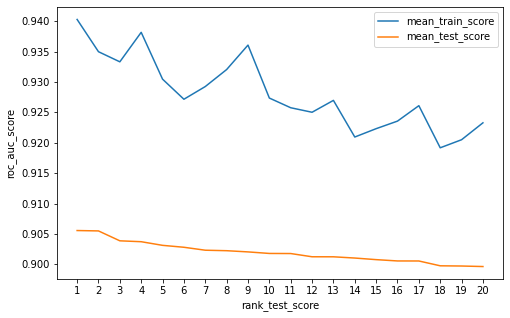

In [210]:
plt.figure(figsize = (8, 5))
plt.plot(cv_results["rank_test_score"][:20], cv_results["mean_train_score"][:20])
plt.plot(cv_results["rank_test_score"][:20], cv_results["mean_test_score"][:20])
plt.xlabel("rank_test_score")
plt.xticks(range(1,21))
plt.ylabel("roc_auc_score")
plt.legend(labels = ["mean_train_score", "mean_test_score"], loc = "upper right")
plt.show()

From looking at the plot and dataframe, it seems that choosing the parameters for which the mean_test_score ranks 6th is the best suitable option because the mean_test_score is almost the same as the highest mean_test_score but the diffence between the mean_train_score and mean_test_score is lower compared to that of the highest test score

In [211]:
cv_results[cv_results["rank_test_score"] == 6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
39,17.356683,0.082757,0.132086,0.01295,5,100,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'n_e...",0.895643,0.909138,0.908633,0.894397,0.906238,0.90281,0.006448,6,0.928401,0.926199,0.926425,0.929045,0.925689,0.927152,0.001321


Building the model using these parameters and evaluating the model's performance on the train data and predicting on the test data

In [212]:
model_2 = RandomForestClassifier(class_weight = "balanced", random_state = 100, max_depth = 5, min_samples_leaf = 100, n_estimators = 200)
model_2.fit(X_train_pca, y_train)
print("Scores on the training data")
pred_score(model_2, X_train_pca, y_train)
print("\n")
print("Scores on the test data")
pred_score(model_2, X_test_pca, y_test)

Scores on the training data
Confusion_matrix :
[[17568  1723]
 [  379  1330]]
Sensitivity : 0.7782328847279111, Specificity : 0.9106837385309211
roc_auc_score :  0.8444583116294162


Scores on the test data
Confusion_matrix :
[[7462  807]
 [ 199  533]]
Sensitivity : 0.7281420765027322, Specificity : 0.9024065787882453
roc_auc_score :  0.8152743276454887


**The roc_auc score on the train data of the random forest model is the same as that of the logistic regression model but the roc_auc score on test data and sensitivity of the random forest model is lower than that of the logistic regression model. Since sensitivity is an important metric for this problem we will go with the logistic regression model (model_1) for predicting churn.**

## CHOOSING THE BEST FEATURES AND BUILDING AN INTERPRETABLE MODEL

Building a random forest model on X_train, y_train without performing PCA

In [213]:
params = {"n_estimators" : [20, 50, 100, 200],
          "max_depth" : [3, 4, 5, 6],
          "min_samples_leaf" : [50, 100, 200, 250]}

rf_fea_sel = GridSearchCV(param_grid = params, estimator = RandomForestClassifier(class_weight = "balanced", random_state = 100),
                          cv = 5, scoring = "roc_auc", verbose = 1, n_jobs = -1, return_train_score = True)
rf_fea_sel.fit(X_train, y_train)
print("Best score :", rf_fea_sel.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best score : 0.9283994540707763


In [214]:
cv_results = pd.DataFrame(rf_fea_sel.cv_results_).sort_values(by = "mean_test_score", ascending = False)
cv_results[["rank_test_score", "mean_train_score", "mean_test_score"]].head(30)

,rank_test_score,mean_train_score,mean_test_score
51,1,0.950383,0.928399
50,2,0.950524,0.928026
55,3,0.945478,0.927354
54,4,0.945723,0.927228
49,5,0.949423,0.926972
38,6,0.940152,0.926018
39,7,0.939927,0.925961
35,8,0.942427,0.925935
53,9,0.944606,0.925858
34,10,0.942365,0.925029


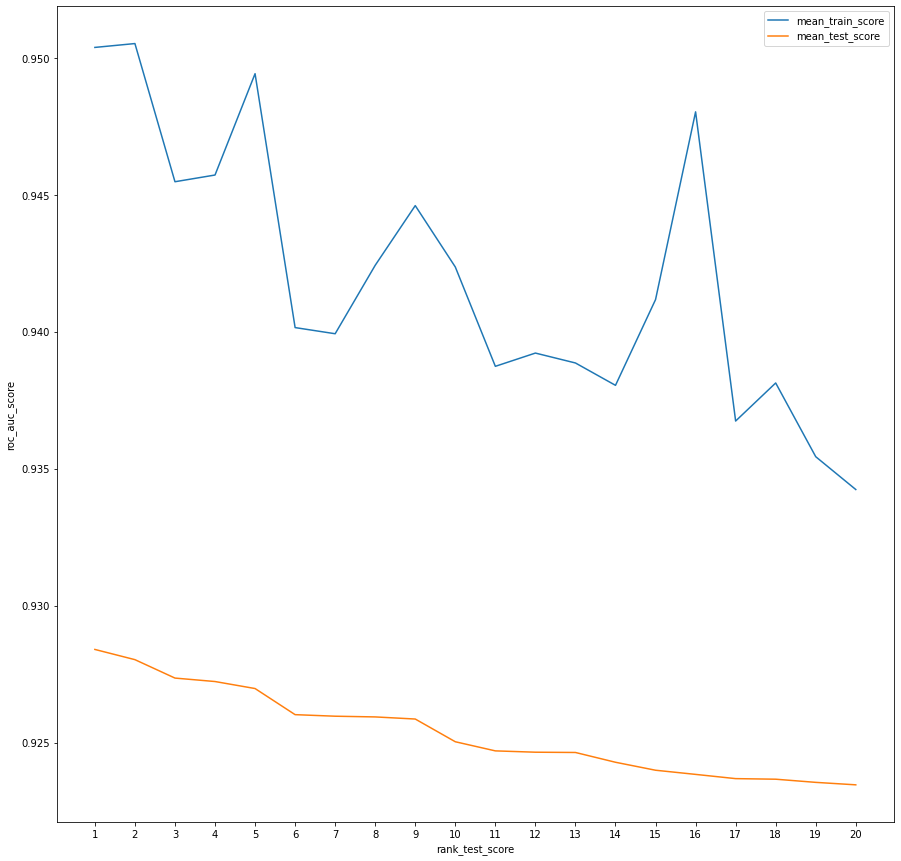

In [215]:
plt.figure(figsize = (15, 15))
plt.plot(cv_results["rank_test_score"][:20], cv_results["mean_train_score"][:20])
plt.plot(cv_results["rank_test_score"][:20], cv_results["mean_test_score"][:20])
plt.xlabel("rank_test_score")
plt.xticks(range(1,21))
plt.ylabel("roc_auc_score")
plt.legend(labels = ["mean_train_score", "mean_test_score"], loc = "upper right")
plt.show()

From the dataframe and the plot we can say that the parameters associated with the mean test score that ranks 7th would be the best set of parameters for the model, because the mean_test_score is almost the same as the best mean_test_score and the difference between the mean_test_score and mean_train_score is lower than that of the best mean_test_score

In [216]:
cv_results[cv_results["rank_test_score"] == 7]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
39,12.705694,0.037034,0.134738,0.000862,5,100,200,"{'max_depth': 5, 'min_samples_leaf': 100, 'n_e...",0.917572,0.935874,0.923899,0.9208,0.93166,0.925961,0.006812,7,0.940837,0.93852,0.939919,0.940592,0.939769,0.939927,0.000809


Building the model using these parameters and evaluating the model's performance on the train data and predicting on the test data

In [217]:
rf_fea_sel = RandomForestClassifier(class_weight = 'balanced', max_depth = 5,
                       min_samples_leaf = 100, n_estimators = 200, random_state = 100)
rf_fea_sel.fit(X_train, y_train)
print("Scores on the training data")
pred_score(rf_fea_sel, X_train, y_train)
print("\n")
print("Scores on the test data")
pred_score(rf_fea_sel, X_test, y_test)

Scores on the training data
Confusion_matrix :
[[17525  1766]
 [  332  1377]]
Sensitivity : 0.8057343475716794, Specificity : 0.9084547198175315
roc_auc_score :  0.8570945336946054


Scores on the test data
Confusion_matrix :
[[7469  800]
 [ 170  562]]
Sensitivity : 0.76775956284153, Specificity : 0.9032531140403919
roc_auc_score :  0.835506338440961


Looking at the feature importance for all features

In [218]:
feature_imp = pd.DataFrame({'Features' : X_train.columns, 'Importance' : rf_fea_sel.feature_importances_})
feature_imp.sort_values(by = 'Importance', inplace = True, ascending = False)
feature_imp.reset_index(drop = True, inplace = True)
feature_imp.head(30)

,Features,Importance
0,total_ic_mou_8,0.080975
1,loc_ic_t2t_mou_8,0.067440
2,total_rech_amt_8,0.046321
3,roam_og_mou_8,0.044132
4,loc_ic_mou_8,0.043232
5,last_day_rch_amt_8,0.038509
6,loc_og_mou_8,0.037284
7,total_rech_amt_diff,0.035620
8,roam_ic_mou_8,0.033202
9,loc_og_t2t_mou_8,0.033197


Selecting the top 20 features based on feature importance

In [219]:
n = 20
top_features = feature_imp["Features"][: n]
top_features

0          total_ic_mou_8
1        loc_ic_t2t_mou_8
2        total_rech_amt_8
3           roam_og_mou_8
4            loc_ic_mou_8
5      last_day_rch_amt_8
6            loc_og_mou_8
7     total_rech_amt_diff
8           roam_ic_mou_8
9        loc_og_t2t_mou_8
10       loc_ic_t2m_mou_8
11              arpu_diff
12       loc_og_t2m_mou_8
13         max_rech_amt_8
14                 arpu_8
15         total_og_mou_8
16       roam_ic_mou_diff
17           std_ic_mou_8
18      total_og_mou_diff
19     av_rech_amt_data_8
Name: Features, dtype: object

Plotting a heatmap for the top 20 features

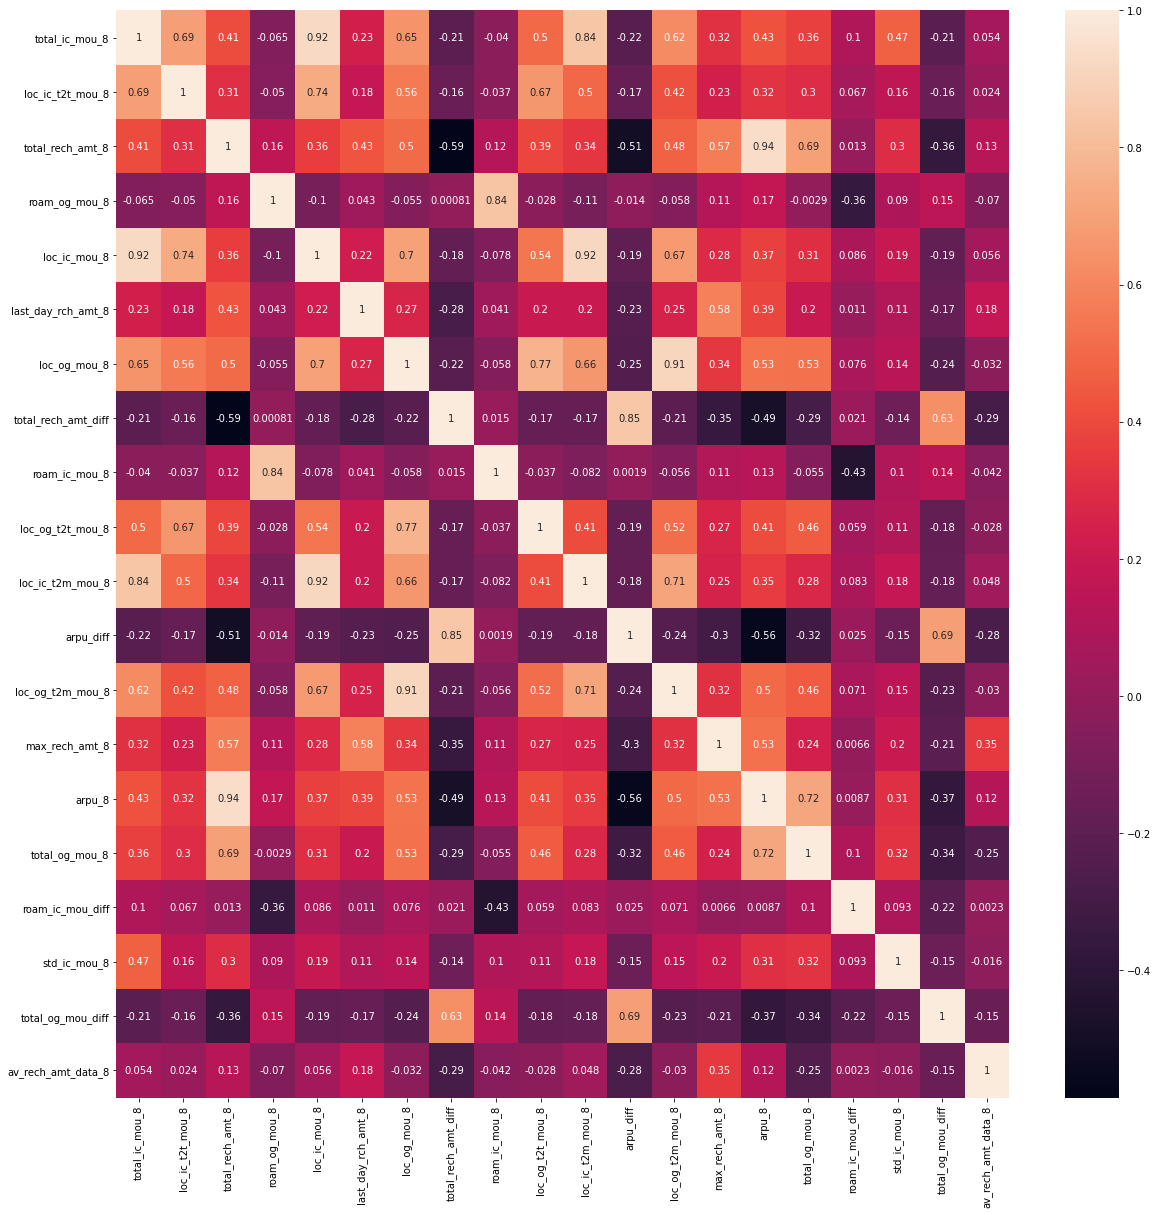

In [220]:
plt.figure(figsize = (20, 20))
sns.heatmap(data = X_train[top_features].corr(), annot = True)
plt.show()

It is evident from the heatmap that multicollinearity exists. Inorder to remove multicollinearity lets remove some of the features using RFE and based on p value and VIF

Tuning the hyperparameter n_features_to_select for RFE

In [221]:
rfe = RFE(estimator = LogisticRegression(class_weight = "balanced", random_state = 100))
params = {"n_features_to_select" : range(8, 21)}

gridsearch_rfe = GridSearchCV(param_grid = params, cv = 5, scoring = "roc_auc",
                              verbose = 1, return_train_score = True,
                              estimator = rfe, n_jobs = -1)
gridsearch_rfe.fit(X_train[top_features], y_train)
print("Best_score :", gridsearch_rfe.best_score_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best_score : 0.8899262338114198


In [222]:
cv_results = pd.DataFrame(gridsearch_rfe.cv_results_).sort_values(by = "mean_test_score", ascending = False)
cv_results["diff_train_test"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]
cv_results[["rank_test_score", "param_n_features_to_select", "mean_train_score", "mean_test_score", "diff_train_test"]]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score,diff_train_test
9,1,17,0.892080,0.889926,0.002154
8,2,16,0.892086,0.889922,0.002164
12,3,20,0.892092,0.889862,0.002230
10,4,18,0.892090,0.889854,0.002236
11,5,19,0.892102,0.889759,0.002343
7,6,15,0.891974,0.889591,0.002382
6,7,14,0.891799,0.889508,0.002292
4,8,12,0.891195,0.889488,0.001707
3,9,11,0.890290,0.889433,0.000857
5,10,13,0.891541,0.889403,0.002138


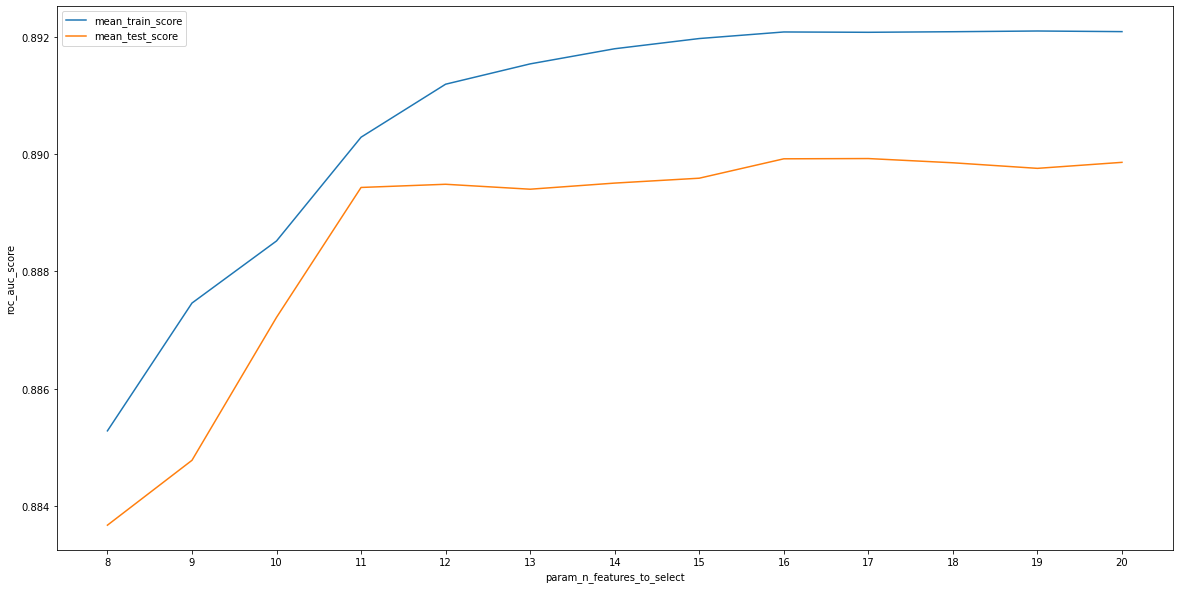

In [223]:
cv_res = cv_results.sort_values(by = "param_n_features_to_select", ascending = False)
plt.figure(figsize = (20, 10))
plt.plot(cv_res["param_n_features_to_select"], cv_res["mean_train_score"])
plt.plot(cv_res["param_n_features_to_select"], cv_res["mean_test_score"])
plt.xlabel("param_n_features_to_select")
plt.xticks(range(8, 21))
plt.ylabel("roc_auc_score")
plt.legend(labels = ["mean_train_score", "mean_test_score"])

The best value for n_features_to_select is 11 since the mean_test_score is the same as the best score and the difference between the mean_train sore and test score is minimum for this value

In [224]:
rfe = RFE(n_features_to_select = 11, estimator = LogisticRegression(class_weight = "balanced", random_state = 100)).fit(X_train[top_features], y_train)
list(zip(X_train[top_features].columns, rfe.ranking_, rfe.support_))

[('total_ic_mou_8', 1, True),
 ('loc_ic_t2t_mou_8', 1, True),
 ('total_rech_amt_8', 1, True),
 ('roam_og_mou_8', 5, False),
 ('loc_ic_mou_8', 7, False),
 ('last_day_rch_amt_8', 1, True),
 ('loc_og_mou_8', 1, True),
 ('total_rech_amt_diff', 1, True),
 ('roam_ic_mou_8', 1, True),
 ('loc_og_t2t_mou_8', 1, True),
 ('loc_ic_t2m_mou_8', 8, False),
 ('arpu_diff', 10, False),
 ('loc_og_t2m_mou_8', 1, True),
 ('max_rech_amt_8', 3, False),
 ('arpu_8', 6, False),
 ('total_og_mou_8', 1, True),
 ('roam_ic_mou_diff', 9, False),
 ('std_ic_mou_8', 4, False),
 ('total_og_mou_diff', 2, False),
 ('av_rech_amt_data_8', 1, True)]

In [225]:
rfe_col = list(X_train[top_features].columns[rfe.support_])

Building a statsmodel in order to eliminate features based on their p-value and VIF

In [226]:
sm_fea = sm.GLM(y_train, sm.add_constant(X_train[rfe_col]), family = sm.families.Binomial()).fit()
sm_fea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3902.8
Date:                Fri, 13 Aug 2021   Deviance:                       7805.5
Time:                        16:18:34   Pearson chi2:                 8.66e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0691      0.068    -60.066      0.000      -4.202      -3.936
total_ic_mou_8         -0.7804      0.085     -9.179      0.000      -0.947      -0.614
loc_ic_t2t_mou_8       -0.7185      0.116     -6.214      0.000      -0.945      -0.492
total_rech_amt_8        0.4119      0.066      6.207      0.000       0.282       0.542
last_day_rch_amt_8     -0.5323      0.050    -10.555      0.000      -0.631      -0.433
loc_og_mou_8            0.2792      0.294      0.949      0.343      -0.298       0.856
total_rech_amt_diff     0.7157      0.042     17.020      0.000       0.633       0.798
roam_ic_mou_8           0.1840      0.026      6.990      0.000       0.132       0.236
loc_og_t2t_mou_8       -0.3353      0.163     -2.052      0.040      -0.656      -0.015
loc_og_t2m_mou_8       -0.2204      0.219     -1.007      0.314      -0.650       0.209
total_og_mou_8         -0.5570      0.060     -9.229      0.000      -0.675      -0.439
av_rech_amt_data_8     -0.9317      0.055    -16.853      0.000      -1.040      -0.823
=======================================================================================
"""

In [227]:
VIF = pd.DataFrame()
VIF["Features"] = X_train[rfe_col].columns
VIF["vif"] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
VIF.sort_values(by = "vif", ascending = False)

,Features,vif
4,loc_og_mou_8,23.120803
8,loc_og_t2m_mou_8,12.900080
7,loc_og_t2t_mou_8,6.180297
2,total_rech_amt_8,3.868777
9,total_og_mou_8,2.939520
1,loc_ic_t2t_mou_8,2.721771
0,total_ic_mou_8,2.652910
5,total_rech_amt_diff,1.688708
10,av_rech_amt_data_8,1.411796
3,last_day_rch_amt_8,1.287876


Since both p value and VIF are high for column loc_og_mou_8, it is dropped

In [228]:
rfe_col.remove("loc_og_mou_8")

Bulding another stasmodel on the remainig features

In [229]:
sm_fea = sm.GLM(y_train, sm.add_constant(X_train[rfe_col]), family = sm.families.Binomial()).fit()
sm_fea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3903.2
Date:                Fri, 13 Aug 2021   Deviance:                       7806.4
Time:                        16:18:34   Pearson chi2:                 9.21e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0680      0.068    -60.097      0.000      -4.201      -3.935
total_ic_mou_8         -0.7793      0.085     -9.146      0.000      -0.946      -0.612
loc_ic_t2t_mou_8       -0.7289      0.115     -6.312      0.000      -0.955      -0.503
total_rech_amt_8        0.4124      0.066      6.212      0.000       0.282       0.543
last_day_rch_amt_8     -0.5315      0.050    -10.536      0.000      -0.630      -0.433
total_rech_amt_diff     0.7162      0.042     17.031      0.000       0.634       0.799
roam_ic_mou_8           0.1839      0.026      6.987      0.000       0.132       0.235
loc_og_t2t_mou_8       -0.2076      0.090     -2.301      0.021      -0.384      -0.031
loc_og_t2m_mou_8       -0.0219      0.063     -0.349      0.727      -0.145       0.101
total_og_mou_8         -0.5559      0.060     -9.216      0.000      -0.674      -0.438
av_rech_amt_data_8     -0.9317      0.055    -16.850      0.000      -1.040      -0.823
=======================================================================================
"""

In [230]:
VIF = pd.DataFrame()
VIF["Features"] = X_train[rfe_col].columns
VIF["vif"] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
VIF.sort_values(by = "vif", ascending = False)

,Features,vif
2,total_rech_amt_8,3.868678
8,total_og_mou_8,2.931893
1,loc_ic_t2t_mou_8,2.705239
0,total_ic_mou_8,2.637811
6,loc_og_t2t_mou_8,2.248343
7,loc_og_t2m_mou_8,2.031609
4,total_rech_amt_diff,1.688380
9,av_rech_amt_data_8,1.411543
3,last_day_rch_amt_8,1.287081
5,roam_ic_mou_8,1.113350


Dropping column loc_og_t2m_mou_8 since it has a high p value

In [231]:
rfe_col.remove("loc_og_t2m_mou_8")

Building a statsmodel on the remaining features

In [232]:
sm_fea = sm.GLM(y_train, sm.add_constant(X_train[rfe_col]), family = sm.families.Binomial()).fit()
sm_fea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3903.2
Date:                Fri, 13 Aug 2021   Deviance:                       7806.5
Time:                        16:18:35   Pearson chi2:                 9.32e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0674      0.068    -60.137      0.000      -4.200      -3.935
total_ic_mou_8         -0.7916      0.078    -10.161      0.000      -0.944      -0.639
loc_ic_t2t_mou_8       -0.7220      0.114     -6.342      0.000      -0.945      -0.499
total_rech_amt_8        0.4111      0.066      6.203      0.000       0.281       0.541
last_day_rch_amt_8     -0.5323      0.050    -10.562      0.000      -0.631      -0.433
total_rech_amt_diff     0.7161      0.042     17.027      0.000       0.634       0.799
roam_ic_mou_8           0.1845      0.026      7.032      0.000       0.133       0.236
loc_og_t2t_mou_8       -0.2169      0.087     -2.506      0.012      -0.387      -0.047
total_og_mou_8         -0.5573      0.060     -9.252      0.000      -0.675      -0.439
av_rech_amt_data_8     -0.9309      0.055    -16.852      0.000      -1.039      -0.823
=======================================================================================
"""

In [233]:
VIF = pd.DataFrame()
VIF["Features"] = X_train[rfe_col].columns
VIF["vif"] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
VIF.sort_values(by = "vif", ascending = False)

,Features,vif
2,total_rech_amt_8,3.781701
7,total_og_mou_8,2.927186
1,loc_ic_t2t_mou_8,2.618782
0,total_ic_mou_8,2.092599
6,loc_og_t2t_mou_8,2.082161
4,total_rech_amt_diff,1.684072
8,av_rech_amt_data_8,1.405426
3,last_day_rch_amt_8,1.284092
5,roam_ic_mou_8,1.106291


All the remaining features do not have high p value nor  high VIF

In [234]:
X_train_fea = X_train[rfe_col]
X_test_fea = X_test[rfe_col]
X_train_fea.head()

,total_ic_mou_8,loc_ic_t2t_mou_8,total_rech_amt_8,last_day_rch_amt_8,total_rech_amt_diff,roam_ic_mou_8,loc_og_t2t_mou_8,total_og_mou_8,av_rech_amt_data_8
81898,1.655459,-0.587513,-0.132161,0.933855,-1.064344,-0.334499,-0.642649,-0.791810,1.872459
33489,-0.758139,-0.463989,-0.626281,-0.143395,0.207553,-0.334499,0.333060,-0.418076,-0.647523
21296,1.968012,2.466566,1.098952,2.018404,-0.453512,-0.334499,3.001705,0.922522,0.883007
85765,-0.188487,-0.677989,-0.349909,-0.992521,0.394420,1.430430,-0.581001,-0.050339,-0.844184
51152,-0.012459,-0.397728,-0.894279,-0.675683,-0.103891,-0.334499,-0.637624,-0.988684,0.489687


Building a logistic regression model on the remaining features

In [235]:
params  = {"C" : [0.001, 0.01, 0.1, 1, 10, 100],
           "penalty" : ["l1", "l2"]}
model_3 = GridSearchCV(param_grid = params, scoring = "roc_auc", verbose = 1,
                       cv = 5, return_train_score = True, n_jobs = -1,
                       estimator = LogisticRegression(class_weight = "balanced", random_state = 100))
model_3.fit(X_train_fea, y_train)
print("Best_Score :",model_3.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best_Score : 0.8892438905011961


In [236]:
cv_results = pd.DataFrame(model_3.cv_results_).sort_values(by = "mean_test_score", ascending = False)
cv_results["diff_train_test"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]
cv_results[["rank_test_score", "mean_train_score", "mean_test_score", "diff_train_test"]]

,rank_test_score,mean_train_score,mean_test_score,diff_train_test
5,1,0.890382,0.889244,0.001138
7,2,0.890394,0.889234,0.001160
9,3,0.890392,0.889229,0.001164
11,4,0.890392,0.889228,0.001165
3,5,0.890091,0.889097,0.000994
1,6,0.886802,0.886206,0.000596
0,7,NaN,NaN,NaN
2,8,NaN,NaN,NaN
4,9,NaN,NaN,NaN
6,10,NaN,NaN,NaN


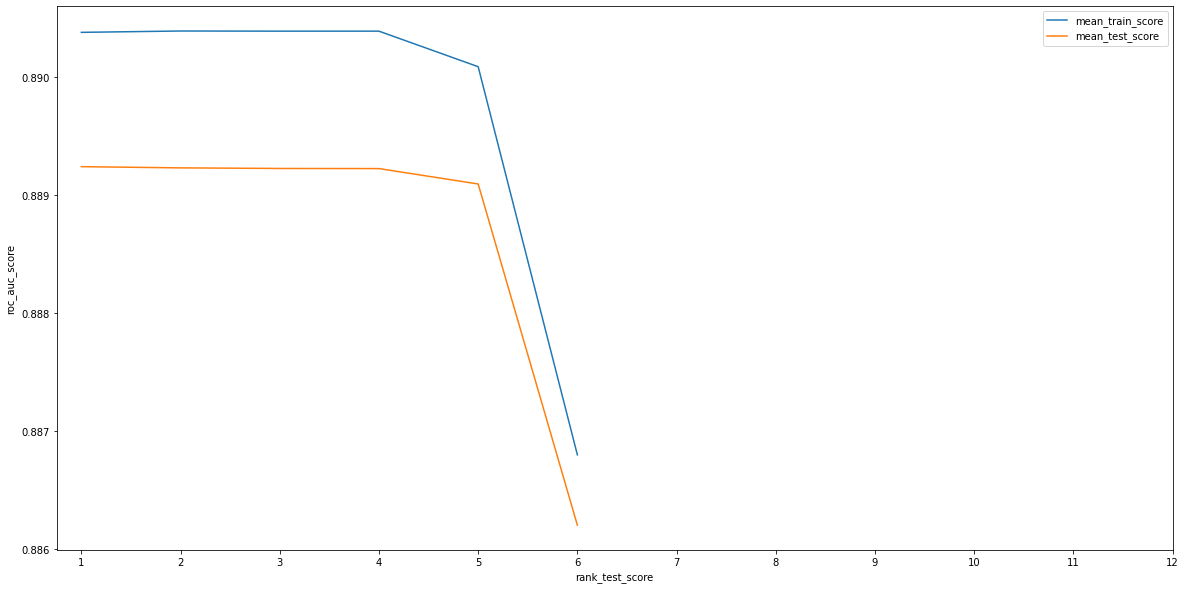

In [237]:
cv_res = cv_results.sort_values(by = "rank_test_score", ascending = False)
plt.figure(figsize = (20, 10))
plt.plot(cv_res["rank_test_score"], cv_res["mean_train_score"])
plt.plot(cv_res["rank_test_score"], cv_res["mean_test_score"])
plt.xlabel("rank_test_score")
plt.xticks(range(1, 13))
plt.ylabel("roc_auc_score")
plt.legend(labels = ["mean_train_score", "mean_test_score"])

From the dataframe and the plot we can say that the parameters associated with the mean test score that ranks 6th would be the best set of parameters for the model, because the mean_test_score is almost the same as the best mean_test_score and the difference between the mean_test_score and mean_train_score is lower than that of the best mean_test_score

In [238]:
cv_results[cv_results["rank_test_score"] == 6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,diff_train_test
1,0.083989,0.023827,0.009095,0.004231,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.872253,0.899124,0.893041,0.874524,0.892086,0.886206,0.010764,6,0.889789,0.884274,0.885352,0.8894,0.885194,0.886802,0.002313,0.000596


Building a logistic regression model using these hyper parameters

In [239]:
model_3 = LogisticRegression(class_weight = "balanced", random_state = 100, penalty = "l2", C = 0.001)
model_3.fit(X_train_fea, y_train)

LogisticRegression(C=0.001, class_weight='balanced', random_state=100)

In [240]:
print("Scores on the training data")
pred_score(model_3, X_train_fea, y_train)
print("\n")
print("Scores on the test data")
pred_score(model_3, X_test_fea, y_test)

Scores on the training data
Confusion_matrix :
[[15556  3735]
 [  302  1407]]
Sensitivity : 0.823288472791106, Specificity : 0.8063863978020839
roc_auc_score :  0.8148374352965949


Scores on the test data
Confusion_matrix :
[[6659 1610]
 [ 149  583]]
Sensitivity : 0.796448087431694, Specificity : 0.8052968920062885
roc_auc_score :  0.8008724897189913


model_3 seems to be performing well on the test data . 
Storing the coffecients of each feature in a dataframe

In [241]:
model_3_coef = [val for subset in model_3.coef_ for val in subset]
model_3_coef = pd.DataFrame({"Features" : X_train_fea.columns, "Coeffecients" : model_3_coef})
model_3_coef

,Features,Coeffecients
0,total_ic_mou_8,-0.448216
1,loc_ic_t2t_mou_8,-0.285449
2,total_rech_amt_8,-0.035076
3,last_day_rch_amt_8,-0.297648
4,total_rech_amt_diff,0.499847
5,roam_ic_mou_8,0.295072
6,loc_og_t2t_mou_8,-0.212056
7,total_og_mou_8,-0.220236
8,av_rech_amt_data_8,-0.522255


Plotting the coeffecients of features

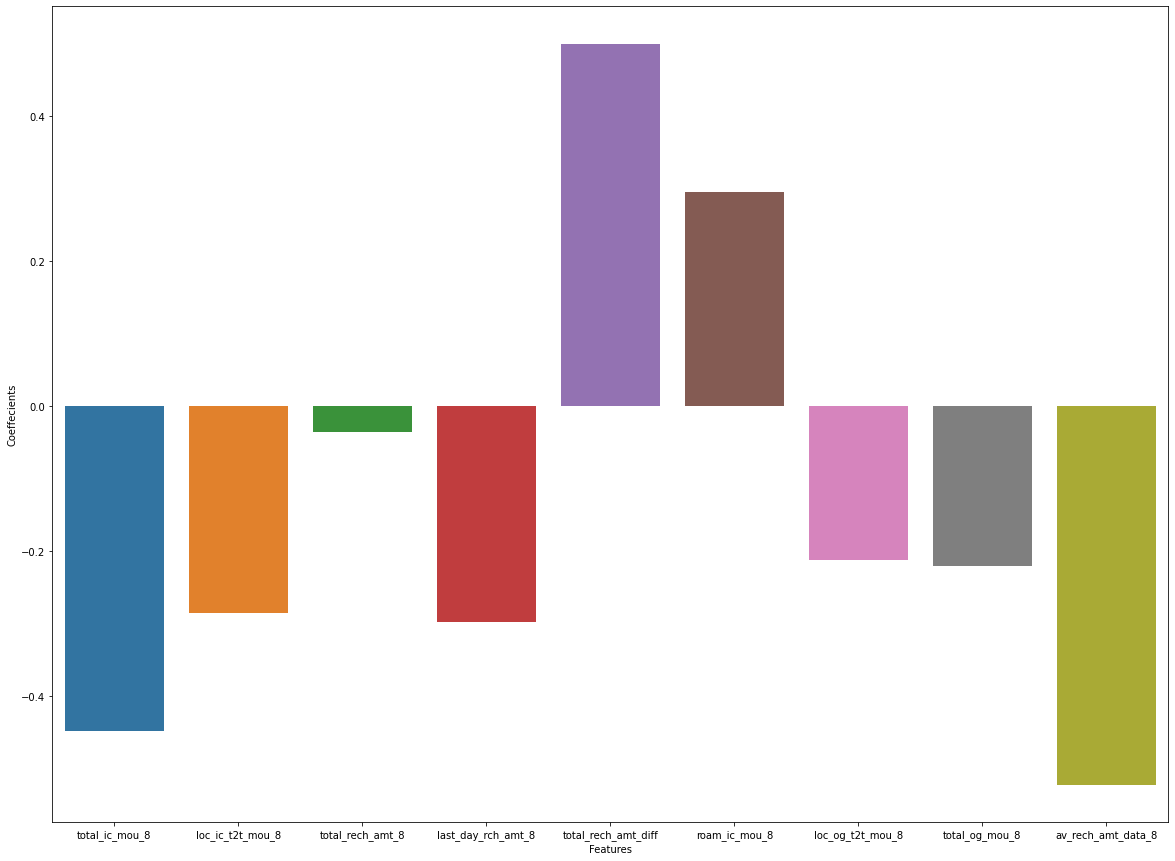

In [242]:
plt.figure(figsize = (20, 15))
sns.barplot(x = "Features", y = "Coeffecients", data = model_3_coef)
plt.show()

# BUSINESS INSIGHTS
* ### The telecom company should provide packages that offer low roaming charges to people that travel often
* ### The telecom company should also try reducing the recharge amount for their packs 